<a href="https://colab.research.google.com/github/M-ballabio1/MachineLearning-projects/blob/main/SP500%20(DecisionTreeRegressor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mplcyberpunk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import svm
import mplcyberpunk
plt.style.use('cyberpunk')

In [ ]:
from google.colab import files
new = files.upload()

Saving AMZN_data.csv to AMZN_data (1).csv


In [ ]:
df = pd.read_csv('AMZN_data.csv', sep=';')
print(df)

            date     open     high      low    close    volume  Name
0     08/02/2013    261.4   265.25  260.555   261.95   3879078  AMZN
1     11/02/2013    263.2   263.25    256.6   257.21   3403403  AMZN
2     12/02/2013   259.19   260.16    257.0   258.70   2938660  AMZN
3     13/02/2013   261.53   269.96    260.3   269.47   5292996  AMZN
4     14/02/2013   267.37   270.65    265.4   269.24   3462780  AMZN
...          ...      ...      ...      ...      ...       ...   ...
1254  01/02/2018   1445.0  1459.88  1385.14  1390.00   9113808  AMZN
1255  02/02/2018  1477.39   1498.0   1414.0  1429.95  11125722  AMZN
1256  05/02/2018  1402.62  1458.98  1320.72  1390.00  11494985  AMZN
1257  06/02/2018  1361.46  1443.99  1351.79  1442.84  11066819  AMZN
1258  07/02/2018   1449.0  1460.99  1415.15  1416.78   7162741  AMZN

[1259 rows x 7 columns]


In [ ]:
df.drop(['date','Name'],1,inplace=True)

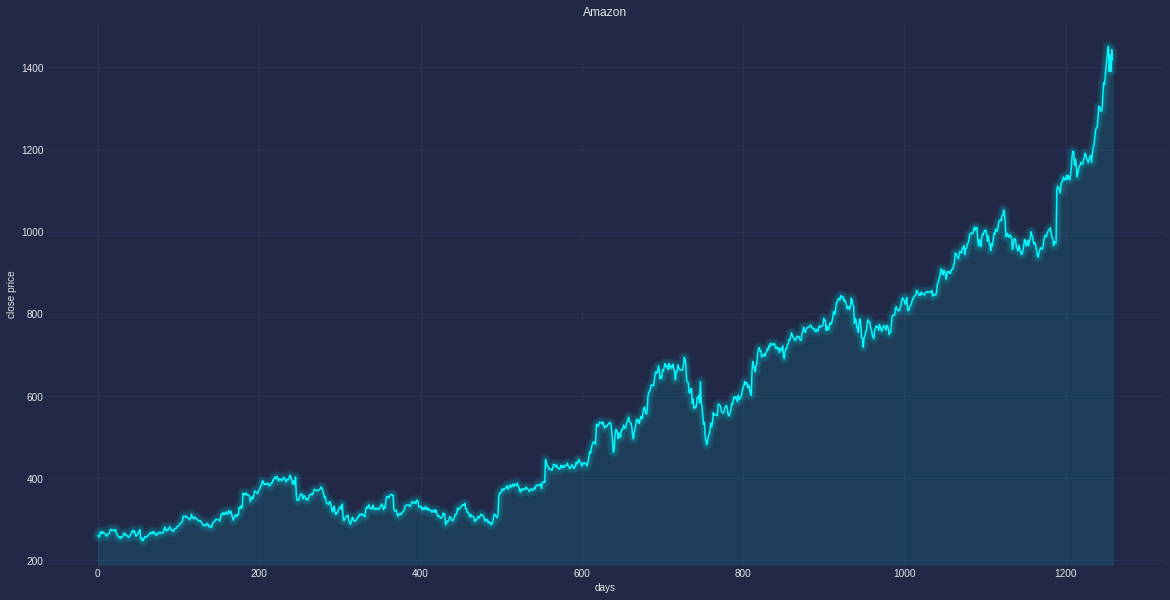

In [ ]:
#visualize the close price
plt.figure(figsize=(20,10))
plt.title('Amazon')
plt.xlabel('days')
plt.ylabel('close price')
plt.plot(df['close'])
mplcyberpunk.add_glow_effects()
plt.show()

In [ ]:
df1 = df[['close']]
df1.head()

,close
0,261.95
1,257.21
2,258.70
3,269.47
4,269.24


In [ ]:
#number days to predict stock prices
future_days = 25
#new column target --> fondamentalmente creiamo una nuova colonna PREDICTION ottenuta shiftando la colonna "close" di 35 days perciò il prezzo di chiusura del 36 giorno di "close" finisce alla prima riga di "Prediction" 
df1['Prediction'] = df1[['close']].shift(-future_days)
df1.head()
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,close,Prediction
0,261.95,257.890
1,257.21,256.410
2,258.70,257.278
3,269.47,253.390
4,269.24,257.750
...,...,...
1254,1390.00,NaN
1255,1429.95,NaN
1256,1390.00,NaN
1257,1442.84,NaN


In [ ]:
#create features dataset (X) --> praticamente siamo andati a togliere dal dataset delle X gli ultimi 35 giorni.
X = np.array(df1.drop(['Prediction'],1))[:-future_days]
print(X)
X.shape  #infatti se notiamo nelle x mancano 35 rows

[[ 261.95]
 [ 257.21]
 [ 258.7 ]
 ...
 [1186.1 ]
 [1169.47]
 [1189.01]]


(1234, 1)

In [ ]:
#create the target (Y)
Y = np.array(df1['Prediction'])[:-future_days]
print(Y)
Y.shape

[ 257.89   256.41   257.278 ... 1390.    1442.84  1416.78 ]


(1234,)

In [ ]:
#Split data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [ ]:
Y_test
Y_test.shape

(247,)

In [ ]:
#Model for data --> dò in input X ed Y entrambe shape 1224 ossia mancanti degli ultimi 35 days cioè, quelli da prevedere.
model = DecisionTreeRegressor().fit(X_train, Y_train)

In [ ]:
#futures --> dò in input gli ultimi 35 valori di "close" del dataset X
x_future = df1.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future.size

25

In [ ]:
#model prediction --> utilizzando i 35 days prima dei 35 days da predire
model_prediction = model.predict(x_future)
print(model_prediction)

[1204.2  1209.59 1229.14 1246.87 1252.7  1254.33 1168.36 1229.14 1229.14
 1295.   1293.32 1294.58 1327.31 1437.82 1417.68 1377.95 1402.05 1417.68
 1437.82 1450.89 1390.   1429.95 1390.   1442.84 1416.78]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


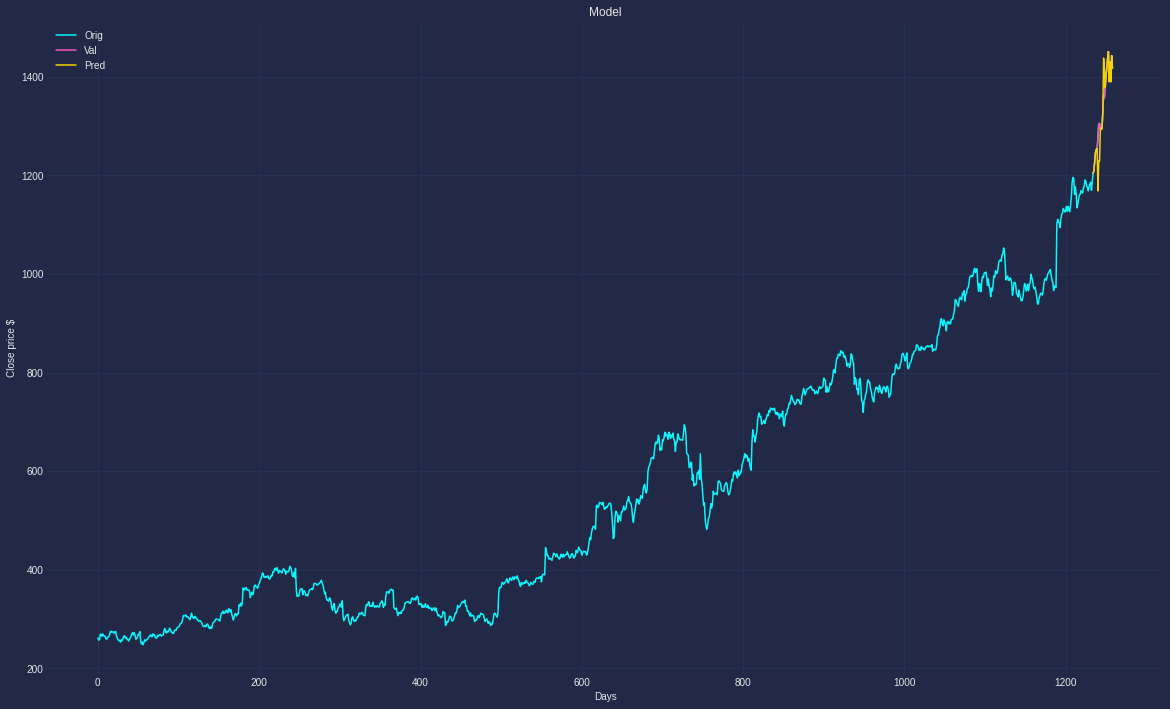

In [ ]:
#visualize data

predizioni = model_prediction

valid = df1[X.shape[0]:]

valid['Prediction'] = predizioni
plt.figure(figsize=(20,12))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price $')
plt.plot(df['close'])
plt.plot(valid[['close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [ ]:
#Decision Tree Model (Supervised Learning)
predizioni

array([1204.2 , 1209.59, 1229.14, 1246.87, 1252.7 , 1254.33, 1168.36,
       1229.14, 1229.14, 1295.  , 1293.32, 1294.58, 1327.31, 1437.82,
       1417.68, 1377.95, 1402.05, 1417.68, 1437.82, 1450.89, 1390.  ,
       1429.95, 1390.  , 1442.84, 1416.78])

In [ ]:
valid = df1[X.shape[0]:]
valid.drop(['Prediction'],1,inplace=True)
valid

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,close
1234,1204.20
1235,1209.59
1236,1229.14
1237,1246.87
1238,1252.70
1239,1254.33
1240,1276.68
1241,1305.20
1242,1304.86
1243,1295.00


In [ ]:
#La funzione r2_score calcola R², il coefficiente di determinazione. Fornisce una misura della probabilità che il modello preveda i campioni futuri.
r2_score(valid, predizioni)

0.7788605590132368

#### Manual cross_validation based on 5 iterations:

1° r2score: 0.9440

2° r2score: 0.6786

3° r2score: 0.9510

4° r2score: 0.7593

5° r2score: 0.7788

###**R2 SCORE final: 0.8223**


In [ ]:
mean_squared_error(valid, predizioni,squared=False)           # RMSE

18.148045073781393